# 1. Import and Load the data

## 1.1 Import library

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as tck

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc, precision_recall_curve, average_precision_score,  mean_squared_error
from sklearn.metrics import homogeneity_score, silhouette_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

#conda install -c conda-forge imbalanced-learn

## 1.2 Load the data

In [2]:
# Load the dataset from creditcard.csv
df = pd.read_csv('creditcard.csv')

In [3]:
#show top 5 rows.
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 2. EDA

## 2.1 Dataset details

In [4]:
#check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
#describe
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
#shape
df.shape

(284807, 31)

This dataset consists of 284,807 rows and 31 columns

## 2.2 Checking NULL and duplicate records

In [7]:
#check null
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

This dataset does not contain null value

In [8]:
#check dupplicate
df.duplicated(keep=False).sum()

1854

found 1,854 duplicate records in this dataset.

In [9]:
#delete dupplicate
df = df.drop_duplicates() 

In [10]:
#shape
df.shape

(283726, 31)

dataset has 283,726 records after delete duplicate records

## 2.3 Visualization

### 2.3.1 Pie Chart

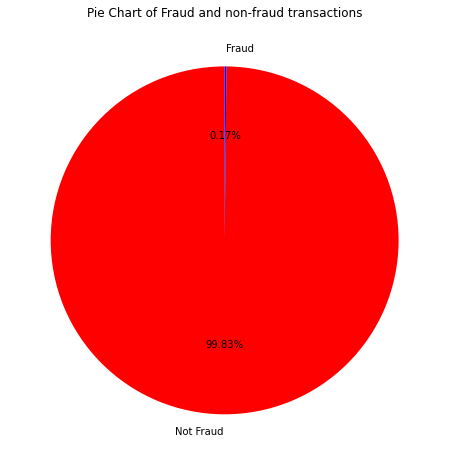

0    283253
1       473
Name: Class, dtype: int64


In [11]:
# Make the pie chart to show Fraud and non-fraud records
df.Class.value_counts().plot(kind='pie', subplots=True, figsize=(8, 8), startangle = 90, labels=['Not Fraud','Fraud'], autopct="%.2f%%", colors = ['red', 'blue'])
plt.title("Pie Chart of Fraud and non-fraud transactions")
plt.ylabel("")
plt.show()

print(df.Class.value_counts())

#### Dataset consists:
- Fraudulent cases: 473 (0.17 %)
- Non-fraudulent cases: 283,253 (99.83 %)

### 2.3.2 Bar chart

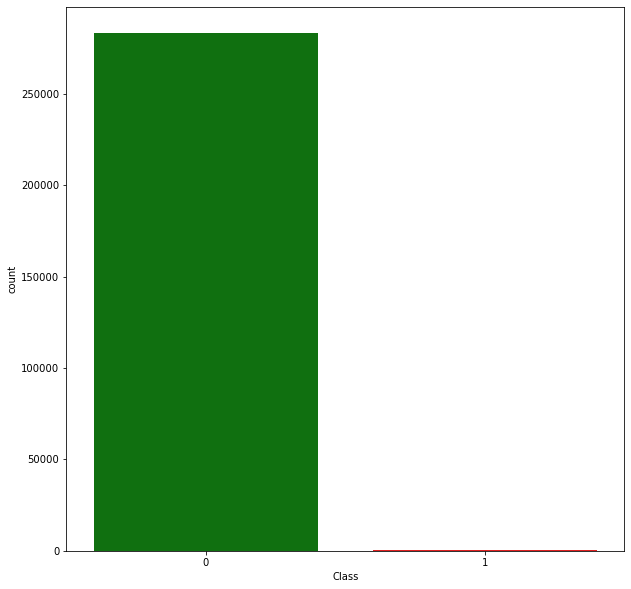

0    283253
1       473
Name: Class, dtype: int64


In [12]:
#Visualize with Bar Chart
plt.figure(figsize=(10,10))
sns.countplot(x = 'Class', data = df, palette=['green',"red"])
plt.show();

print(df.Class.value_counts())

#### Regarding the number of records, The ratio of fraudulent transactions is very low. This is a case of class imbalance problem

### 2.3.3 Multivariate Analysis

#### 2.3.3.1 Scatter plot

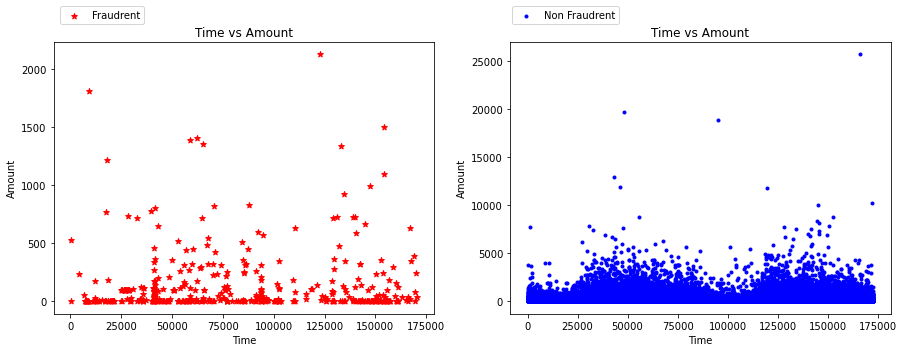

In [13]:
# plot relation with different scale
df1 = df[df['Class']==1]
df2 = df[df['Class']==0]
fig, ax = plt.subplots(1,2, figsize=(15, 5))

ax[0].scatter(df1['Time'], df1['Amount'], color='red', marker= '*', label='Fraudrent')
ax[0].set_title('Time vs Amount')
ax[0].set(xlabel="Time", ylabel="Amount")
ax[0].legend(bbox_to_anchor =(0.25, 1.15))

ax[1].scatter(df2['Time'], df2['Amount'], color='blue', marker= '.', label='Non Fraudrent')
ax[1].set_title('Time vs Amount')
ax[1].set(xlabel="Time", ylabel="Amount")
ax[1].legend(bbox_to_anchor =(0.3, 1.15))

plt.show();

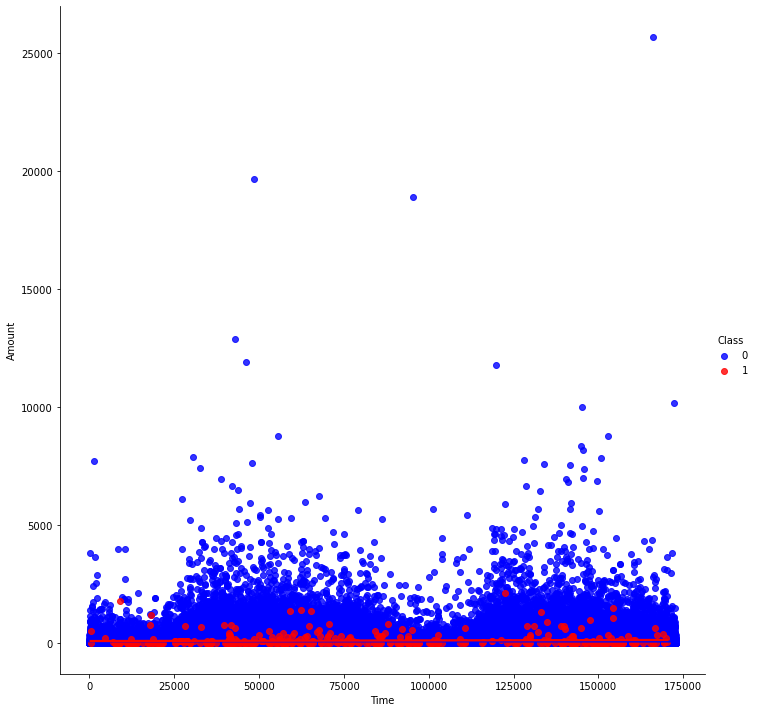

In [14]:
sns.lmplot(x='Time', y='Amount', hue='Class', data=df, height=10, palette=['blue','red']);

#### 2.3.3.2 Boxplot & Histogram

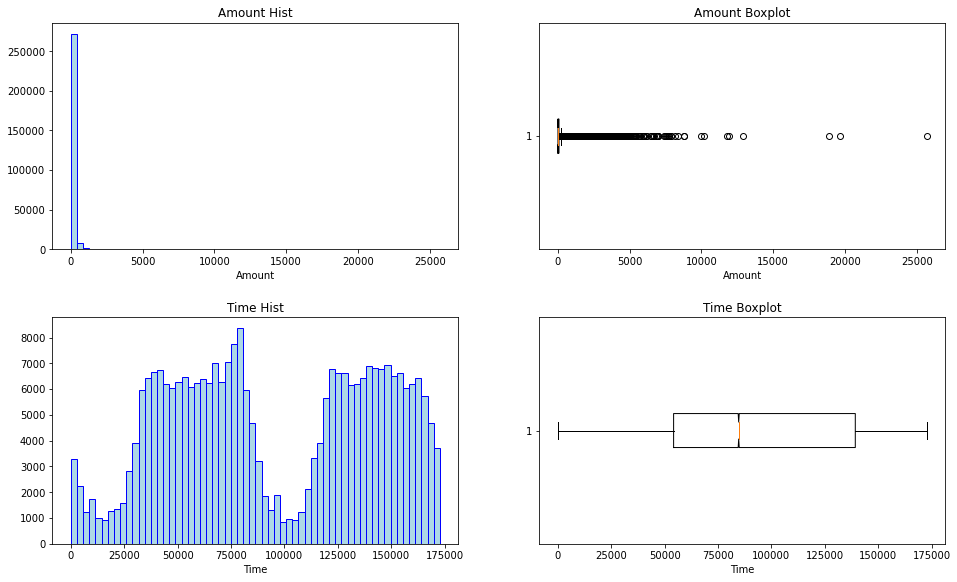

In [15]:
plt.figure(figsize=(16,15))
plt.subplot(3,2,1)
plt.title('Amount Hist')
plt.xlabel('Amount')
histPrice = plt.hist(df.Amount,bins=60, color='lightblue', edgecolor='blue')

plt.subplot(3,2,2)
plt.title('Amount Boxplot')
boxplotPrice = plt.boxplot(df.Amount,notch=True, vert=False)
plt.xlabel('Amount')

plt.subplot(3,2,3)
plt.title('Time Hist')
plt.xlabel('Time')
histPrice = plt.hist(df.Time,bins=60, color='lightblue', edgecolor='blue')

plt.subplot(3,2,4)
plt.title('Time Boxplot')
boxplotPrice = plt.boxplot(df.Time,notch=True, vert=False)
plt.xlabel('Time')

plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

### 2.3.4 Remove Outliner 
We found some outliners in this dataset. we decided to remove it.

#### 2.3.4.1 removed some outliers that amount is over 15000

In [16]:
#removed some outliers that amount is over 15000
df_final = df
df_final = df_final.loc[(df_final.Amount < 15000)]

#### 2.3.4.2 Scatter plot (after removed outliers)

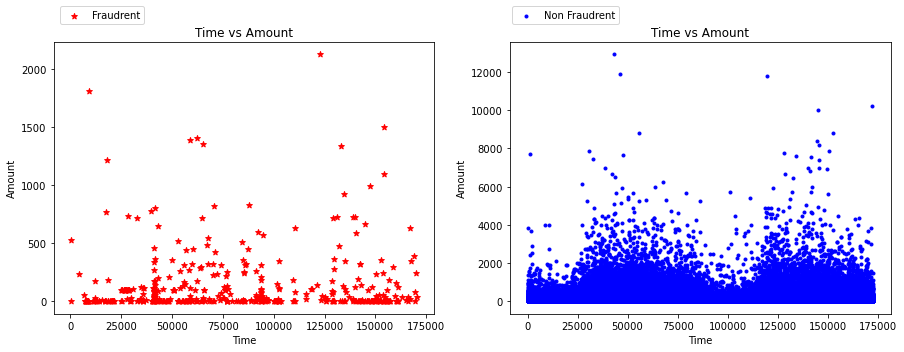

In [17]:
# plot relation with different scale after removed outliners
df1 = df_final[df_final['Class']==1]
df2 = df_final[df_final['Class']==0]
fig, ax = plt.subplots(1,2, figsize=(15, 5))

ax[0].scatter(df1['Time'], df1['Amount'], color='red', marker= '*', label='Fraudrent')
ax[0].set_title('Time vs Amount')
ax[0].set(xlabel="Time", ylabel="Amount")
ax[0].legend(bbox_to_anchor =(0.25, 1.15))

ax[1].scatter(df2['Time'], df2['Amount'], color='blue', marker= '.', label='Non Fraudrent')
ax[1].set_title('Time vs Amount')
ax[1].set(xlabel="Time", ylabel="Amount")
ax[1].legend(bbox_to_anchor =(0.3, 1.15))

plt.show();

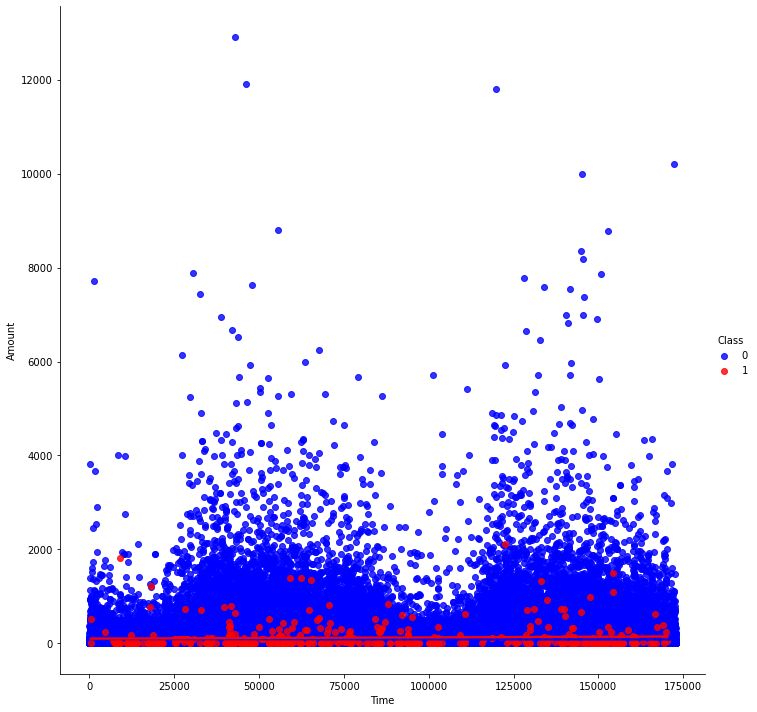

In [18]:
sns.lmplot(x='Time', y='Amount', hue='Class', data=df_final, height=10, palette=['blue','red']);

#### 2.3.4.3 Boxplot & Histogram (after removed outliers)

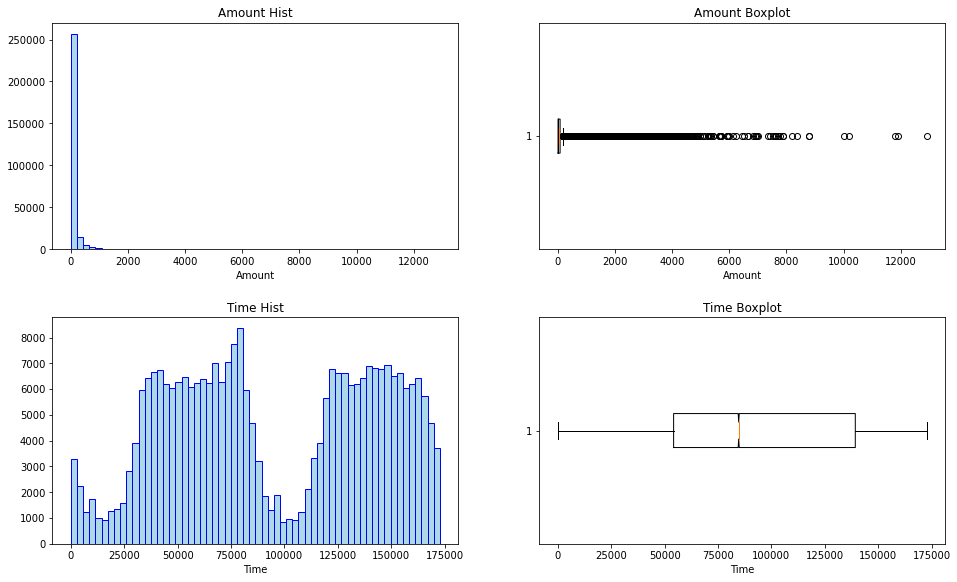

In [19]:
plt.figure(figsize=(16,15))
plt.subplot(3,2,1)
plt.title('Amount Hist')
plt.xlabel('Amount')
histPrice = plt.hist(df_final.Amount,bins=60, color='lightblue', edgecolor='blue')

plt.subplot(3,2,2)
plt.title('Amount Boxplot')
boxplotPrice = plt.boxplot(df_final.Amount,notch=True, vert=False)
plt.xlabel('Amount')

plt.subplot(3,2,3)
plt.title('Time Hist')
plt.xlabel('Time')
histPrice = plt.hist(df_final.Time,bins=60, color='lightblue', edgecolor='blue')

plt.subplot(3,2,4)
plt.title('Time Boxplot')
boxplotPrice = plt.boxplot(df_final.Time,notch=True, vert=False)
plt.xlabel('Time')

plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

### 2.3.5 Heatmap

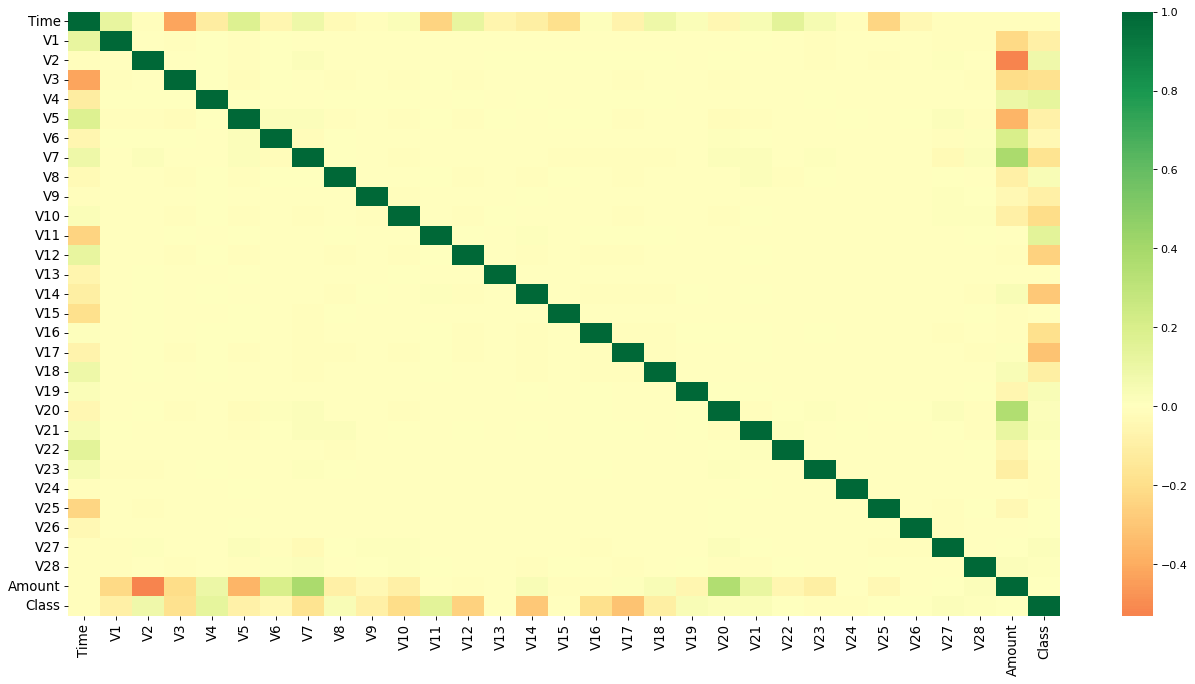

In [20]:
#Heatmap
plt.figure(figsize=(20,10), dpi= 80)
sns.heatmap(df_final.corr(), xticklabels=df_final.corr().columns, yticklabels=df_final.corr().columns, cmap='RdYlGn', center=0)

# Decorations
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

There are no correlation between v1 to v28 features. this contains some correlation. 
- Amount correlated with V7 and V20, negatively correlated with V1, V2 and V5
- Time negatively correlated with V3

### 2.3.6 Data Visualization to visualize the fraud to non-fraud ratio.

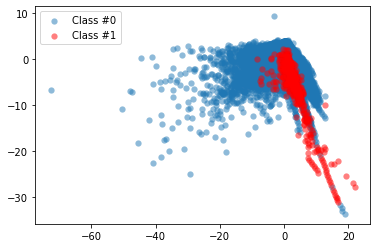

In [21]:
#Visualize the original data
plt.scatter(df_final.V2[df.Class == 0], df_final.V3[df.Class == 0], label="Class #0", alpha=0.5, linewidth=0.15)
plt.scatter(df_final.V2[df.Class == 1], df_final.V3[df.Class == 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
plt.legend()
plt.show()

Regarding the visualization, We can immediately see how fraud cases are scattered over the data, and how few cases we have. A picture often makes the imbalance problem clear.

### 2.3.7 Data Visualization to visualize the fraud to non-fraud ratio with resampling method

- SMOTE
- Random Undersampling (RUS)
- Random Oversampling (ROS)

In [22]:
#Define prep data function
def prep_data(df):
    """
    Convert the DataFrame into two variable
    X: data columns (V1 - V28)
    y: lable column
    """
    X = df.iloc[:, 2:30].values
    y = df.Class.values
    return X, y

In [23]:
# Define a function to create a scatter plot of our data and labels
def plot_data(X, y):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

In [24]:
# Run the prep_data function
X, y = prep_data(df_final)

print(f'X shape: {X.shape}\ny shape: {y.shape}')

X shape: (283723, 28)
y shape: (283723,)


#### 2.3.7.1 SMOTE method

X_smote shape: (566500, 28)
y_rsmote shape: (566500,)


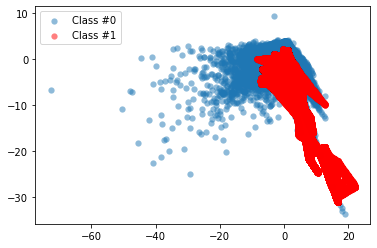

In [25]:
# Define the SMOTE method
smote = SMOTE()

# Create the SMOTE feature set
X_smote, y_smote = smote.fit_resample(X, y)

print(f'X_smote shape: {X_smote.shape}\ny_rsmote shape: {y_smote.shape}')

# Plot the SMOTE data
plot_data(X_smote, y_smote)

#### 2.3.7.2 Oversampling method

X_over shape: (424875, 28)
y_over shape: (424875,)


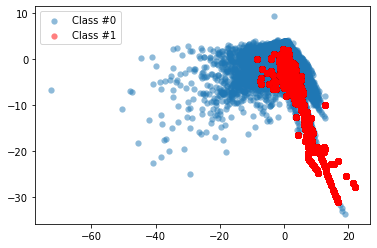

In [26]:
# Define the Oversampling method
oversample = RandomOverSampler(sampling_strategy=0.5)

# Create the Oversampling feature set
X_over, y_over = oversample.fit_resample(X, y)

print(f'X_over shape: {X_over.shape}\ny_over shape: {y_over.shape}')

# Plot the Oversampling data
plot_data(X_over, y_over)

#### 2.3.7.3 Undersampling method

X_under shape: (1419, 28)
y_under shape: (1419,)


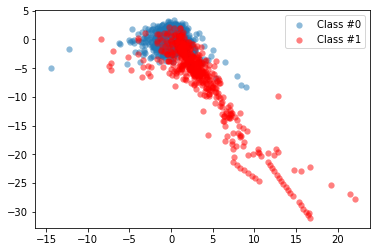

In [27]:
# Define the Undersampling method
undersample = RandomUnderSampler(sampling_strategy=0.5)

# Create the Oversampling feature set
X_under, y_under = undersample.fit_resample(X, y)

print(f'X_under shape: {X_under.shape}\ny_under shape: {y_under.shape}')

# Plot the Undersampling data
plot_data(X_under, y_under)

### 2.3.8 Visualize to compare the original data with data from resampling method

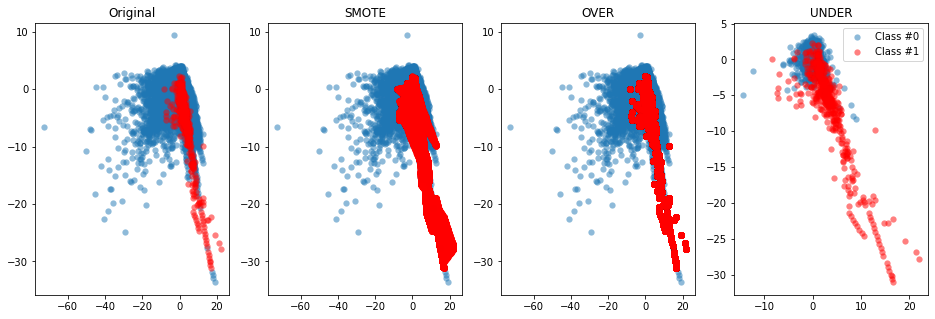

In [28]:
plt.figure(figsize=(16,5))
plt.subplot(1,4,1)
plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
plt.title('Original')
plt.subplot(1,4,2)
plt.scatter(X_smote[y_smote == 0, 0], X_smote[y_smote == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
plt.scatter(X_smote[y_smote == 1, 0], X_smote[y_smote == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
plt.title('SMOTE')
plt.subplot(1,4,3)
plt.scatter(X_over[y_over == 0, 0], X_over[y_over == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
plt.scatter(X_over[y_over == 1, 0], X_over[y_over == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
plt.title('OVER')
plt.subplot(1,4,4)
plt.scatter(X_under[y_under == 0, 0], X_under[y_under == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
plt.scatter(X_under[y_under == 1, 0], X_under[y_under == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
plt.title('UNDER')
plt.legend()
plt.show()

By visualizing the data, we can easily observe the distribution of our fraud cases and how few cases we have in our dataset.


# 3. Feature engineering


We decided to perform a various classification models technique consisting:
- LogisticRegression
- KNeighborsClassifier
- GaussianNB
- DecisionTreeClassifier
- RandomForestClassifier
- AdaBoostClassifier
- XGBClassifier
- CatBoostClassifier

## 3.1 Define Train and Test dateset. 

In [29]:
X = df_final.drop(['Class'], axis=1)
y = df_final['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 42)

print(f'X_train shape: {X_train.shape}\ny_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}\ny_test shape: {y_test.shape}')


X_train shape: (226978, 30)
y_train shape: (226978,)
X_test shape: (56745, 30)
y_test shape: (56745,)


## 3.2 Define Models

In [30]:
models = [
    LogisticRegression(), 
    KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2), 
    GaussianNB(),
    DecisionTreeClassifier(criterion = 'entropy', random_state = 0),
    RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0),
    AdaBoostClassifier(),
    XGBClassifier(), 
    CatBoostClassifier()
]

## 3.3 Define perform pipeline function

In [31]:
#define pipeline function
def run_pipeline(resampling):
    #check, is this include a resamplaing method?
    if(resampling == ''):
        pipe = Pipeline([
                ('Classifier',model)
            ])
    else:
        pipe = Pipeline([
                ('Resampling',resampling),
                ('Classifier',model)
            ])
    #fit
    pipe.fit(X_train,y_train)
    names.append(model.__class__.__name__)
    
    #Train Score
    y_pred_train = pipe.predict(X_train)
    accuracy_s_train.append(accuracy_score(y_train, y_pred_train.round()))
    r2_train.append(pipe.score(X_train,y_train))
    rmse_train.append(mean_squared_error(y_train,y_pred_train, squared=False))
    roc_train.append(roc_auc_score(y_train, y_pred_train))
    
    #Test Score
    y_pred = pipe.predict(X_test)
    accuracy_s.append(accuracy_score(y_test, y_pred.round()))
    r2.append(pipe.score(X_test,y_test))
    rmse.append(mean_squared_error(y_test,y_pred, squared=False))
    curr_roc_test_score = roc_auc_score(y_test, y_pred)
    roc.append(curr_roc_test_score)
    
    #ROC_AUC
    y_pred_proba = pipe.predict_proba(X_test)[:,1]
    fpr_result, tpr_result, threshold = roc_curve(y_test, y_pred_proba)
    auc_score.append(auc(fpr_result, tpr_result))
    #auc_score.append(curr_roc_test_score)
    fpr.append(fpr_result)
    tpr.append(tpr_result)
    
    #Report
    y_pred_report.append(y_pred)
    
    #record the name of resampling method
    if(resampling == ''):
        resampling_name.append('-')
    else:
        resampling_name.append(resampling.__class__.__name__)


## 3.4 Define the lollipop chart generate function

In [89]:
def PlotLollipopChart (df_chart, title):
    # Draw plot
    
    fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
    ax.vlines(x=df_chart.index, ymin=0, ymax=df_chart['Accuracy score (Test)'], color='firebrick', alpha=0.7, linewidth=2)
    ax.scatter(x=df_chart.index, y=df_chart['Accuracy score (Test)'], s=75, color='firebrick', alpha=0.7)

    # Title, Label, Ticks and Ylim
    ax.set_title(title, fontdict={'size':22})
    ax.set_ylim(0.90, 1.10)
    ax.yaxis.set_minor_locator(tck.MultipleLocator(0.001))
    ax.set_ylabel('Accuracy')
    ax.set_xlabel("Classification Models")
    ax.set_xticks(df_chart.index)
    ax.set_xticklabels(df_chart.Classifier.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})

    # Annotate
    for row in df_chart.itertuples():
        ax.text(row.Index, row[3]+.025, s=round(row[3], 6), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)
    
    plt.show()

## 3.5 Define ROC graph generate function 

In [33]:
def ROCGraph (roc_df):
    #Draw plot
    plt.figure(figsize=(10, 8), dpi=100)
    plt.plot([0, 1], [0, 1], 'k--')
    for index, row in roc_df.iterrows():
        plt.plot(row.FPR, row.TPR, label=row.Classifier + ' (auc = %0.6f)' % row.AUC)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    plt.legend(loc='best')
    plt.show();

## 3.5 Define Classification Report and Confusion Matrix generate function

In [93]:
def ModelResult(df_result, limit):
    #for loop ordered by accuracy score
    for run_idx in df_result.index:
        for index, y_pred in enumerate(y_pred_report):
            #condition to display only the name that equal to the ordered classifier name
            if(df_result['Classifier'][run_idx] == names[index]):
                print(names[index]+' Report: \n')
                # the ROC curve, classification report and confusion matrix
                print('ROC Score:')
                print(roc[index])
                print('\nClassification Report:')
                print(classification_report(y_test, y_pred))
                print('\nConfusion Matrix:')
                print(confusion_matrix(y_test, y_pred))
                print('\n\n')
        #check limit to display a classifier report
        if run_idx == (limit-1):
            break

## 3.2 Imbalance dataset

### 3.2.1 implement the pipeline for imbalance dataset

In [35]:
#set emply for valiable
names = []
resampling_name = []

#test 
r2 = []
rmse = []
roc = []
accuracy_s = []
auc_score = []
fpr = []
tpr = []
y_pred_report = []

#train
r2_train = []
rmse_train = []
roc_train = []
accuracy_s_train = []

#perform the pipeline
for model in models:
    run_pipeline('')

#convert result to a dataframe format.
ori_roc_result_df = pd.DataFrame(zip(names,resampling_name,auc_score,fpr,tpr),columns=['Classifier','Resampling','AUC','FPR','TPR'])
ori_res_df = pd.DataFrame(zip(names,resampling_name,accuracy_s,roc,r2,rmse,accuracy_s_train,roc_train,r2_train,rmse_train),columns=['Classifier','Resampling','Accuracy score (Test)','ROC-AUC (Test)','R2 score (Test)','RMSE (Test)','Accuracy score (Train)','ROC-AUC (Train)','R2 score (Train)','RMSE (Train)'])


/Users/maxllxam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/maxllxam/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/U

[19:50:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.104457
0:	learn: 0.3534078	total: 105ms	remaining: 1m 45s
1:	learn: 0.1766093	total: 123ms	remaining: 1m 1s
2:	learn: 0.0939566	total: 144ms	remaining: 48s
3:	learn: 0.0511665	total: 166ms	remaining: 41.2s
4:	learn: 0.0299394	total: 185ms	remaining: 36.9s
5:	learn: 0.0188855	total: 206ms	remaining: 34.1s
6:	learn: 0.0128419	total: 228ms	remaining: 32.4s
7:	learn: 0.0092794	total: 250ms	remaining: 31s
8:	learn: 0.0071302	total: 272ms	remaining: 30s
9:	learn: 0.0058562	total: 296ms	remaining: 29.3s
10:	learn: 0.0049413	total: 317ms	remaining: 28.5s
11:	learn: 0.0043146	total: 337ms	remaining: 27.7s
12:	learn: 0.0038299	total: 356ms	remaining: 27.1s
13:	learn: 0.0035005	total: 375ms	remaining: 26.4s
14:	learn: 0.003249

166:	learn: 0.0012896	total: 3.52s	remaining: 17.6s
167:	learn: 0.0012879	total: 3.54s	remaining: 17.5s
168:	learn: 0.0012838	total: 3.56s	remaining: 17.5s
169:	learn: 0.0012816	total: 3.58s	remaining: 17.5s
170:	learn: 0.0012792	total: 3.6s	remaining: 17.5s
171:	learn: 0.0012692	total: 3.62s	remaining: 17.4s
172:	learn: 0.0012628	total: 3.64s	remaining: 17.4s
173:	learn: 0.0012567	total: 3.66s	remaining: 17.4s
174:	learn: 0.0012532	total: 3.68s	remaining: 17.4s
175:	learn: 0.0012363	total: 3.7s	remaining: 17.3s
176:	learn: 0.0012345	total: 3.72s	remaining: 17.3s
177:	learn: 0.0012313	total: 3.74s	remaining: 17.3s
178:	learn: 0.0012235	total: 3.76s	remaining: 17.3s
179:	learn: 0.0012211	total: 3.78s	remaining: 17.2s
180:	learn: 0.0012116	total: 3.8s	remaining: 17.2s
181:	learn: 0.0012090	total: 3.83s	remaining: 17.2s
182:	learn: 0.0012054	total: 3.85s	remaining: 17.2s
183:	learn: 0.0012037	total: 3.86s	remaining: 17.1s
184:	learn: 0.0011977	total: 3.88s	remaining: 17.1s
185:	learn: 0.0

333:	learn: 0.0007516	total: 7.04s	remaining: 14s
334:	learn: 0.0007507	total: 7.06s	remaining: 14s
335:	learn: 0.0007455	total: 7.08s	remaining: 14s
336:	learn: 0.0007413	total: 7.1s	remaining: 14s
337:	learn: 0.0007399	total: 7.12s	remaining: 13.9s
338:	learn: 0.0007393	total: 7.14s	remaining: 13.9s
339:	learn: 0.0007382	total: 7.16s	remaining: 13.9s
340:	learn: 0.0007353	total: 7.18s	remaining: 13.9s
341:	learn: 0.0007326	total: 7.2s	remaining: 13.9s
342:	learn: 0.0007311	total: 7.22s	remaining: 13.8s
343:	learn: 0.0007305	total: 7.25s	remaining: 13.8s
344:	learn: 0.0007260	total: 7.27s	remaining: 13.8s
345:	learn: 0.0007257	total: 7.29s	remaining: 13.8s
346:	learn: 0.0007240	total: 7.31s	remaining: 13.8s
347:	learn: 0.0007198	total: 7.33s	remaining: 13.7s
348:	learn: 0.0007164	total: 7.35s	remaining: 13.7s
349:	learn: 0.0007155	total: 7.37s	remaining: 13.7s
350:	learn: 0.0007133	total: 7.39s	remaining: 13.7s
351:	learn: 0.0007113	total: 7.41s	remaining: 13.6s
352:	learn: 0.0007086	

492:	learn: 0.0004402	total: 10.3s	remaining: 10.6s
493:	learn: 0.0004394	total: 10.4s	remaining: 10.6s
494:	learn: 0.0004379	total: 10.4s	remaining: 10.6s
495:	learn: 0.0004365	total: 10.4s	remaining: 10.6s
496:	learn: 0.0004345	total: 10.4s	remaining: 10.6s
497:	learn: 0.0004331	total: 10.4s	remaining: 10.5s
498:	learn: 0.0004327	total: 10.5s	remaining: 10.5s
499:	learn: 0.0004314	total: 10.5s	remaining: 10.5s
500:	learn: 0.0004309	total: 10.5s	remaining: 10.5s
501:	learn: 0.0004290	total: 10.5s	remaining: 10.4s
502:	learn: 0.0004275	total: 10.6s	remaining: 10.4s
503:	learn: 0.0004262	total: 10.6s	remaining: 10.4s
504:	learn: 0.0004236	total: 10.6s	remaining: 10.4s
505:	learn: 0.0004223	total: 10.6s	remaining: 10.4s
506:	learn: 0.0004201	total: 10.6s	remaining: 10.3s
507:	learn: 0.0004190	total: 10.7s	remaining: 10.3s
508:	learn: 0.0004186	total: 10.7s	remaining: 10.3s
509:	learn: 0.0004175	total: 10.7s	remaining: 10.3s
510:	learn: 0.0004169	total: 10.7s	remaining: 10.3s
511:	learn: 

652:	learn: 0.0002532	total: 13.7s	remaining: 7.26s
653:	learn: 0.0002525	total: 13.7s	remaining: 7.23s
654:	learn: 0.0002523	total: 13.7s	remaining: 7.21s
655:	learn: 0.0002517	total: 13.7s	remaining: 7.19s
656:	learn: 0.0002509	total: 13.7s	remaining: 7.17s
657:	learn: 0.0002507	total: 13.8s	remaining: 7.15s
658:	learn: 0.0002505	total: 13.8s	remaining: 7.13s
659:	learn: 0.0002498	total: 13.8s	remaining: 7.11s
660:	learn: 0.0002494	total: 13.8s	remaining: 7.09s
661:	learn: 0.0002489	total: 13.8s	remaining: 7.07s
662:	learn: 0.0002487	total: 13.9s	remaining: 7.04s
663:	learn: 0.0002478	total: 13.9s	remaining: 7.02s
664:	learn: 0.0002472	total: 13.9s	remaining: 7s
665:	learn: 0.0002469	total: 13.9s	remaining: 6.98s
666:	learn: 0.0002464	total: 13.9s	remaining: 6.96s
667:	learn: 0.0002454	total: 14s	remaining: 6.94s
668:	learn: 0.0002452	total: 14s	remaining: 6.92s
669:	learn: 0.0002449	total: 14s	remaining: 6.9s
670:	learn: 0.0002446	total: 14s	remaining: 6.88s
671:	learn: 0.0002444	to

813:	learn: 0.0001716	total: 17s	remaining: 3.88s
814:	learn: 0.0001706	total: 17s	remaining: 3.86s
815:	learn: 0.0001692	total: 17s	remaining: 3.84s
816:	learn: 0.0001689	total: 17s	remaining: 3.82s
817:	learn: 0.0001681	total: 17.1s	remaining: 3.8s
818:	learn: 0.0001678	total: 17.1s	remaining: 3.78s
819:	learn: 0.0001677	total: 17.1s	remaining: 3.75s
820:	learn: 0.0001671	total: 17.1s	remaining: 3.73s
821:	learn: 0.0001670	total: 17.2s	remaining: 3.71s
822:	learn: 0.0001667	total: 17.2s	remaining: 3.69s
823:	learn: 0.0001667	total: 17.2s	remaining: 3.67s
824:	learn: 0.0001664	total: 17.2s	remaining: 3.65s
825:	learn: 0.0001664	total: 17.2s	remaining: 3.63s
826:	learn: 0.0001663	total: 17.3s	remaining: 3.61s
827:	learn: 0.0001660	total: 17.3s	remaining: 3.59s
828:	learn: 0.0001658	total: 17.3s	remaining: 3.57s
829:	learn: 0.0001649	total: 17.3s	remaining: 3.55s
830:	learn: 0.0001645	total: 17.3s	remaining: 3.53s
831:	learn: 0.0001644	total: 17.4s	remaining: 3.5s
832:	learn: 0.0001641	

973:	learn: 0.0001254	total: 20.3s	remaining: 542ms
974:	learn: 0.0001253	total: 20.3s	remaining: 522ms
975:	learn: 0.0001252	total: 20.4s	remaining: 501ms
976:	learn: 0.0001251	total: 20.4s	remaining: 480ms
977:	learn: 0.0001250	total: 20.4s	remaining: 459ms
978:	learn: 0.0001247	total: 20.4s	remaining: 438ms
979:	learn: 0.0001245	total: 20.4s	remaining: 417ms
980:	learn: 0.0001245	total: 20.5s	remaining: 396ms
981:	learn: 0.0001240	total: 20.5s	remaining: 376ms
982:	learn: 0.0001239	total: 20.5s	remaining: 355ms
983:	learn: 0.0001239	total: 20.5s	remaining: 334ms
984:	learn: 0.0001238	total: 20.6s	remaining: 313ms
985:	learn: 0.0001237	total: 20.6s	remaining: 292ms
986:	learn: 0.0001232	total: 20.6s	remaining: 271ms
987:	learn: 0.0001231	total: 20.6s	remaining: 250ms
988:	learn: 0.0001230	total: 20.6s	remaining: 230ms
989:	learn: 0.0001225	total: 20.7s	remaining: 209ms
990:	learn: 0.0001224	total: 20.7s	remaining: 188ms
991:	learn: 0.0001220	total: 20.7s	remaining: 167ms
992:	learn: 

In [36]:
#sorting the result

ori_roc_result_df = ori_roc_result_df.sort_values(by='AUC',ascending=False).reset_index(drop=True)
ori_res_df = ori_res_df.sort_values(by='Accuracy score (Test)',ascending=False).reset_index(drop=True)
ori_res_df

,Classifier,Resampling,Accuracy score (Test),ROC-AUC (Test),R2 score (Test),RMSE (Test),Accuracy score (Train),ROC-AUC (Train),R2 score (Train),RMSE (Train)
0,CatBoostClassifier,-,0.999630,0.891540,0.999630,0.019237,0.999991,0.997436,0.999991,0.002968
1,RandomForestClassifier,-,0.999577,0.873468,0.999577,0.020566,0.999881,0.965385,0.999881,0.010907
2,XGBClassifier,-,0.999524,0.867426,0.999524,0.021813,1.000000,1.000000,1.000000,0.000000
3,DecisionTreeClassifier,-,0.999295,0.879342,0.999295,0.026550,1.000000,1.000000,1.000000,0.000000
4,AdaBoostClassifier,-,0.999277,0.795119,0.999277,0.026880,0.999269,0.861410,0.999269,0.027043
5,LogisticRegression,-,0.999031,0.801011,0.999031,0.031133,0.999004,0.842080,0.999004,0.031555
6,KNeighborsClassifier,-,0.998555,0.512039,0.998555,0.038014,0.998401,0.535895,0.998401,0.039991
7,GaussianNB,-,0.992898,0.779894,0.992898,0.084273,0.992766,0.826157,0.992766,0.085054


### 3.2.2 Compare the accuracy score with chart

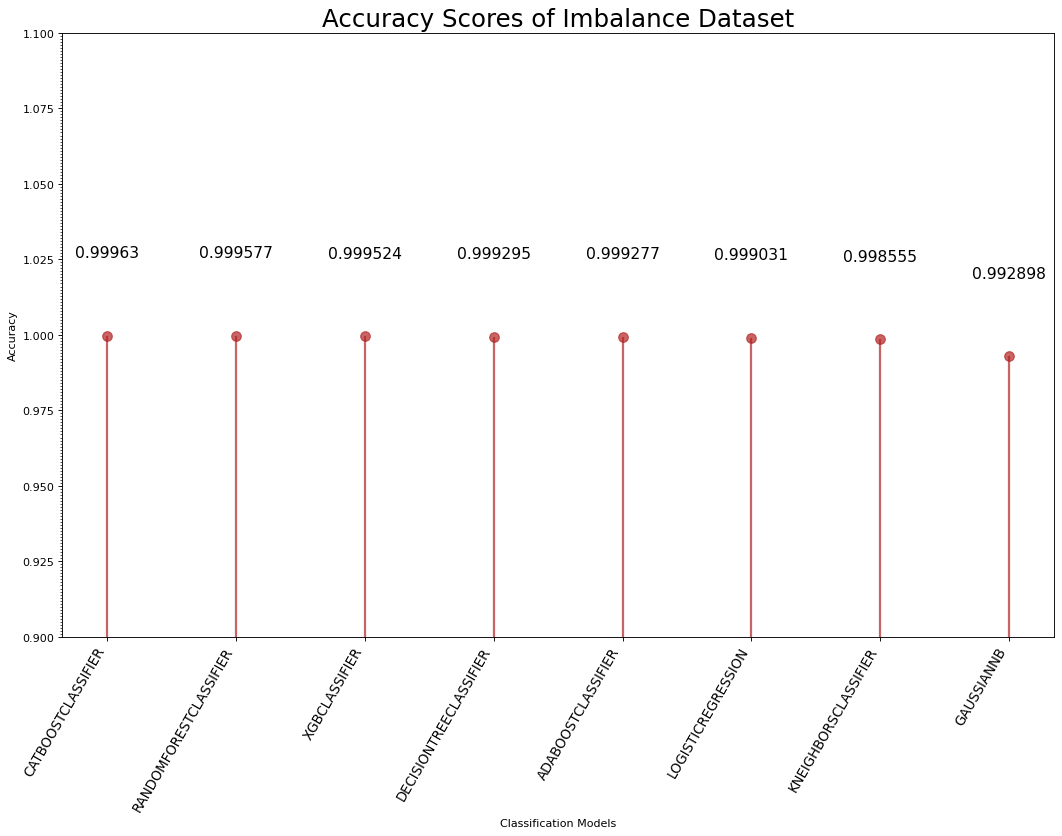

In [90]:
#plot a chart
PlotLollipopChart(ori_res_df, 'Accuracy Scores of Imbalance Dataset')

### 3.2.3 ROC Report

In [38]:
#Show the top 4 models of Classification Report
ModelResult(ori_res_df,4)

CatBoostClassifier Report: 

ROC Score:
0.8915397922918953

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56662
           1       0.96      0.78      0.86        83

    accuracy                           1.00     56745
   macro avg       0.98      0.89      0.93     56745
weighted avg       1.00      1.00      1.00     56745


Confusion Matrix:
[[56659     3]
 [   18    65]]



RandomForestClassifier Report: 

ROC Score:
0.8734675031352689

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56662
           1       0.95      0.75      0.84        83

    accuracy                           1.00     56745
   macro avg       0.98      0.87      0.92     56745
weighted avg       1.00      1.00      1.00     56745


Confusion Matrix:
[[56659     3]
 [   21    62]]



XGBClassifier Report: 

ROC Score:
0.8674257582374962

Classification 

### 3.2.4 ROC Graph

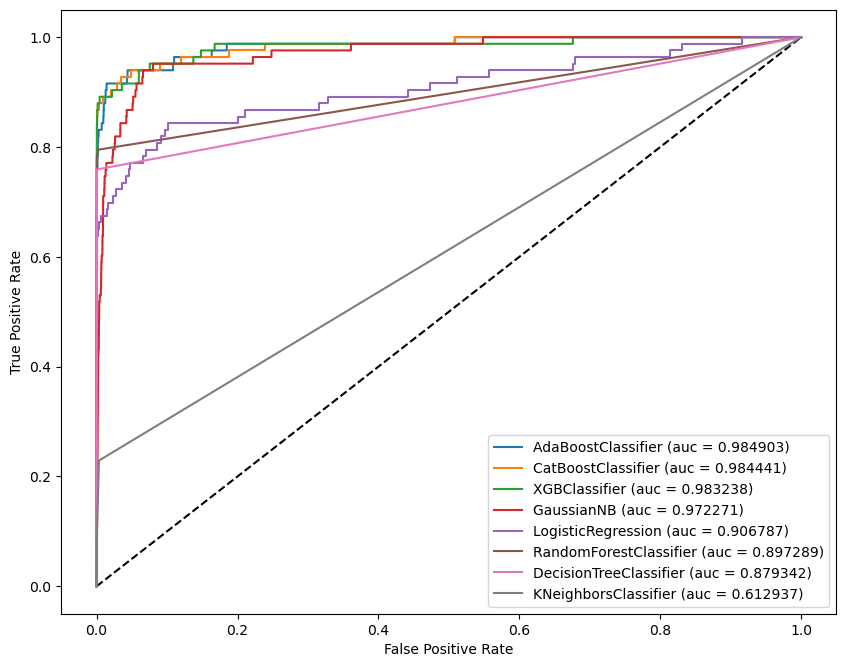

In [39]:
#Plot ROC Graph and AUC Score
ROCGraph(ori_roc_result_df) #sort the score

### 3.2.5 Result
#### Based on predictive accuracy. the CatBoostClassifier model is the best model with score is 0.999630. followd by RandomForestClassifier model with score is 0.999577.
#### Therefore, the CatBoostClassifier is the best model for out-of-sample predictions of the original dataest.

## 3.3 Balance dataset with SMOTE

### 3.3.1 implement the pipeline for balance dataset with SMOTE

In [40]:
#set emply for valiable
names = []
resampling_name = []

#test 
r2 = []
rmse = []
roc = []
accuracy_s = []
auc_score = []
fpr = []
tpr = []
y_pred_report = []

#train
r2_train = []
rmse_train = []
roc_train = []
accuracy_s_train = []

#perform the pipeline with SMOTE method
for model in models:
    run_pipeline(SMOTE())

#convert result to a dataframe format.
smote_roc_result_df = pd.DataFrame(zip(names,resampling_name,auc_score,fpr,tpr),columns=['Classifier','Resampling','AUC','FPR','TPR'])
smote_res_df = pd.DataFrame(zip(names,resampling_name,accuracy_s,roc,r2,rmse,accuracy_s_train,roc_train,r2_train,rmse_train),columns=['Classifier','Resampling','Accuracy score (Test)','ROC-AUC (Test)','R2 score (Test)','RMSE (Test)','Accuracy score (Train)','ROC-AUC (Train)','R2 score (Train)','RMSE (Train)'])


/Users/maxllxam/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/maxllxam/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:42:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.140333
0:	learn: 0.4141199	total: 61.7ms	remaining: 1m 1s
1:	learn: 0.2778425	total: 117ms	remaining: 58.4s
2:	learn: 0.1948641	total: 156ms	remaining: 51.8s
3:	learn: 0.1536948	total: 195ms	remaining: 48.6s
4:	learn: 0.1271254	total: 234ms	remaining: 46.6s
5:	learn: 0.1142401	total: 271ms	remaining: 44.9s
6:	learn: 0.1004285	total: 309ms	remaining: 43.8s
7:	learn: 0.0921191	total: 349ms	remaining: 43.3s
8:	learn: 0.0821259	total: 349ms	remaining: 43.3s
9:	learn: 0.0753873	total: 416ms	remaining: 45.7s
10:	learn: 0.0710749	total: 488ms	remaining: 48.3s
11:	learn: 0.0677897	total: 526ms	remaining: 47.3s
12:	learn: 0.0643231	total: 576ms	remaining: 47.4s
13:	learn: 0.0618166	total: 612ms	remaining: 46.4s
14:	learn: 0.

156:	learn: 0.0037027	total: 5.67s	remaining: 30.6s
157:	learn: 0.0036843	total: 5.7s	remaining: 30.6s
158:	learn: 0.0036386	total: 5.73s	remaining: 30.5s
159:	learn: 0.0035441	total: 5.77s	remaining: 30.5s
160:	learn: 0.0035232	total: 5.8s	remaining: 30.4s
161:	learn: 0.0034928	total: 5.84s	remaining: 30.4s
162:	learn: 0.0034697	total: 5.89s	remaining: 30.4s
163:	learn: 0.0034500	total: 5.94s	remaining: 30.5s
164:	learn: 0.0034135	total: 5.97s	remaining: 30.4s
165:	learn: 0.0033871	total: 6.02s	remaining: 30.4s
166:	learn: 0.0033397	total: 6.06s	remaining: 30.4s
167:	learn: 0.0033189	total: 6.1s	remaining: 30.4s
168:	learn: 0.0032771	total: 6.14s	remaining: 30.4s
169:	learn: 0.0032284	total: 6.17s	remaining: 30.3s
170:	learn: 0.0031869	total: 6.21s	remaining: 30.3s
171:	learn: 0.0031389	total: 6.24s	remaining: 30.2s
172:	learn: 0.0031085	total: 6.27s	remaining: 30.2s
173:	learn: 0.0030753	total: 6.31s	remaining: 30.1s
174:	learn: 0.0030401	total: 6.34s	remaining: 30.1s
175:	learn: 0.0

318:	learn: 0.0025403	total: 10.4s	remaining: 22.3s
319:	learn: 0.0025403	total: 10.4s	remaining: 22.2s
320:	learn: 0.0025403	total: 10.4s	remaining: 22.2s
321:	learn: 0.0025403	total: 10.4s	remaining: 22.1s
322:	learn: 0.0025403	total: 10.5s	remaining: 22.1s
323:	learn: 0.0025403	total: 10.5s	remaining: 22s
324:	learn: 0.0025403	total: 10.5s	remaining: 22s
325:	learn: 0.0025403	total: 10.5s	remaining: 21.9s
326:	learn: 0.0025403	total: 10.6s	remaining: 21.9s
327:	learn: 0.0025403	total: 10.6s	remaining: 21.8s
328:	learn: 0.0025403	total: 10.6s	remaining: 21.8s
329:	learn: 0.0025403	total: 10.6s	remaining: 21.7s
330:	learn: 0.0025403	total: 10.6s	remaining: 21.7s
331:	learn: 0.0025403	total: 10.7s	remaining: 21.6s
332:	learn: 0.0025403	total: 10.7s	remaining: 21.6s
333:	learn: 0.0025403	total: 10.7s	remaining: 21.5s
334:	learn: 0.0025403	total: 10.7s	remaining: 21.5s
335:	learn: 0.0025403	total: 10.8s	remaining: 21.4s
336:	learn: 0.0025403	total: 10.8s	remaining: 21.4s
337:	learn: 0.00

484:	learn: 0.0025363	total: 14.6s	remaining: 15.6s
485:	learn: 0.0025363	total: 14.6s	remaining: 15.5s
486:	learn: 0.0025363	total: 14.6s	remaining: 15.5s
487:	learn: 0.0025362	total: 14.6s	remaining: 15.5s
488:	learn: 0.0025362	total: 14.7s	remaining: 15.4s
489:	learn: 0.0025362	total: 14.7s	remaining: 15.4s
490:	learn: 0.0025362	total: 14.7s	remaining: 15.4s
491:	learn: 0.0025361	total: 14.7s	remaining: 15.3s
492:	learn: 0.0025361	total: 14.8s	remaining: 15.3s
493:	learn: 0.0025361	total: 14.8s	remaining: 15.2s
494:	learn: 0.0025361	total: 14.8s	remaining: 15.2s
495:	learn: 0.0025360	total: 14.9s	remaining: 15.2s
496:	learn: 0.0025360	total: 14.9s	remaining: 15.1s
497:	learn: 0.0025360	total: 14.9s	remaining: 15.1s
498:	learn: 0.0025359	total: 14.9s	remaining: 15.1s
499:	learn: 0.0025359	total: 15s	remaining: 15s
500:	learn: 0.0025359	total: 15s	remaining: 15s
501:	learn: 0.0025359	total: 15s	remaining: 15s
502:	learn: 0.0025359	total: 15s	remaining: 14.9s
503:	learn: 0.0025359	tota

644:	learn: 0.0025357	total: 18.9s	remaining: 10.4s
645:	learn: 0.0025357	total: 18.9s	remaining: 10.4s
646:	learn: 0.0025357	total: 18.9s	remaining: 10.4s
647:	learn: 0.0025357	total: 18.9s	remaining: 10.3s
648:	learn: 0.0025357	total: 19s	remaining: 10.3s
649:	learn: 0.0025357	total: 19s	remaining: 10.3s
650:	learn: 0.0025357	total: 19s	remaining: 10.2s
651:	learn: 0.0025357	total: 19s	remaining: 10.2s
652:	learn: 0.0025357	total: 19.1s	remaining: 10.2s
653:	learn: 0.0025357	total: 19.1s	remaining: 10.1s
654:	learn: 0.0025357	total: 19.1s	remaining: 10.1s
655:	learn: 0.0025357	total: 19.1s	remaining: 10.1s
656:	learn: 0.0025357	total: 19.2s	remaining: 10.1s
657:	learn: 0.0025357	total: 19.2s	remaining: 10s
658:	learn: 0.0025357	total: 19.2s	remaining: 9.99s
659:	learn: 0.0025357	total: 19.2s	remaining: 9.96s
660:	learn: 0.0025357	total: 19.3s	remaining: 9.92s
661:	learn: 0.0025357	total: 19.3s	remaining: 9.89s
662:	learn: 0.0025357	total: 19.3s	remaining: 9.86s
663:	learn: 0.0025357	

805:	learn: 0.0025355	total: 22.9s	remaining: 5.54s
806:	learn: 0.0025355	total: 22.9s	remaining: 5.51s
807:	learn: 0.0025355	total: 23s	remaining: 5.48s
808:	learn: 0.0025355	total: 23s	remaining: 5.45s
809:	learn: 0.0025355	total: 23s	remaining: 5.42s
810:	learn: 0.0025355	total: 23s	remaining: 5.39s
811:	learn: 0.0025355	total: 23.1s	remaining: 5.37s
812:	learn: 0.0025355	total: 23.1s	remaining: 5.33s
813:	learn: 0.0025355	total: 23.1s	remaining: 5.3s
814:	learn: 0.0025355	total: 23.1s	remaining: 5.28s
815:	learn: 0.0025355	total: 23.2s	remaining: 5.25s
816:	learn: 0.0025355	total: 23.2s	remaining: 5.22s
817:	learn: 0.0025355	total: 23.2s	remaining: 5.19s
818:	learn: 0.0025355	total: 23.2s	remaining: 5.16s
819:	learn: 0.0025355	total: 23.3s	remaining: 5.13s
820:	learn: 0.0025355	total: 23.3s	remaining: 5.1s
821:	learn: 0.0025355	total: 23.3s	remaining: 5.07s
822:	learn: 0.0025355	total: 23.3s	remaining: 5.04s
823:	learn: 0.0025355	total: 23.3s	remaining: 5.01s
824:	learn: 0.0025355	

965:	learn: 0.0025353	total: 26.8s	remaining: 947ms
966:	learn: 0.0025353	total: 26.8s	remaining: 920ms
967:	learn: 0.0025353	total: 26.9s	remaining: 892ms
968:	learn: 0.0025353	total: 26.9s	remaining: 864ms
969:	learn: 0.0025353	total: 26.9s	remaining: 836ms
970:	learn: 0.0025353	total: 26.9s	remaining: 808ms
971:	learn: 0.0025353	total: 27s	remaining: 780ms
972:	learn: 0.0025353	total: 27s	remaining: 752ms
973:	learn: 0.0025353	total: 27s	remaining: 724ms
974:	learn: 0.0025353	total: 27s	remaining: 696ms
975:	learn: 0.0025353	total: 27s	remaining: 668ms
976:	learn: 0.0025353	total: 27.1s	remaining: 640ms
977:	learn: 0.0025353	total: 27.1s	remaining: 612ms
978:	learn: 0.0025353	total: 27.1s	remaining: 584ms
979:	learn: 0.0025353	total: 27.1s	remaining: 556ms
980:	learn: 0.0025353	total: 27.2s	remaining: 528ms
981:	learn: 0.0025353	total: 27.2s	remaining: 500ms
982:	learn: 0.0025353	total: 27.2s	remaining: 473ms
983:	learn: 0.0025353	total: 27.2s	remaining: 445ms
984:	learn: 0.0025353	

In [41]:
#sorting the result

smote_roc_result_df = smote_roc_result_df.sort_values(by='AUC',ascending=False).reset_index(drop=True)
smote_res_df = smote_res_df.sort_values(by='Accuracy score (Test)',ascending=False).reset_index(drop=True)
smote_res_df

,Classifier,Resampling,Accuracy score (Test),ROC-AUC (Test),R2 score (Test),RMSE (Test),Accuracy score (Train),ROC-AUC (Train),R2 score (Train),RMSE (Train)
0,RandomForestClassifier,SMOTE,0.999489,0.897484,0.999489,0.022607,0.999991,0.999996,0.999991,0.002968
1,XGBClassifier,SMOTE,0.999471,0.903491,0.999471,0.022993,1.000000,1.000000,1.000000,0.000000
2,CatBoostClassifier,SMOTE,0.999225,0.909383,0.999225,0.027846,0.999705,0.998572,0.999705,0.017181
3,DecisionTreeClassifier,SMOTE,0.998167,0.878777,0.998167,0.042811,1.000000,1.000000,1.000000,0.000000
4,GaussianNB,SMOTE,0.992193,0.845709,0.992193,0.088356,0.992678,0.882426,0.992678,0.085570
5,AdaBoostClassifier,SMOTE,0.987435,0.933556,0.987435,0.112094,0.987999,0.938956,0.987999,0.109550
6,LogisticRegression,SMOTE,0.979734,0.947745,0.979734,0.142359,0.979936,0.934918,0.979936,0.141646
7,KNeighborsClassifier,SMOTE,0.946674,0.696595,0.946674,0.230925,0.965829,0.981605,0.965829,0.184853


### 3.3.2 Compare the accuracy score with chart

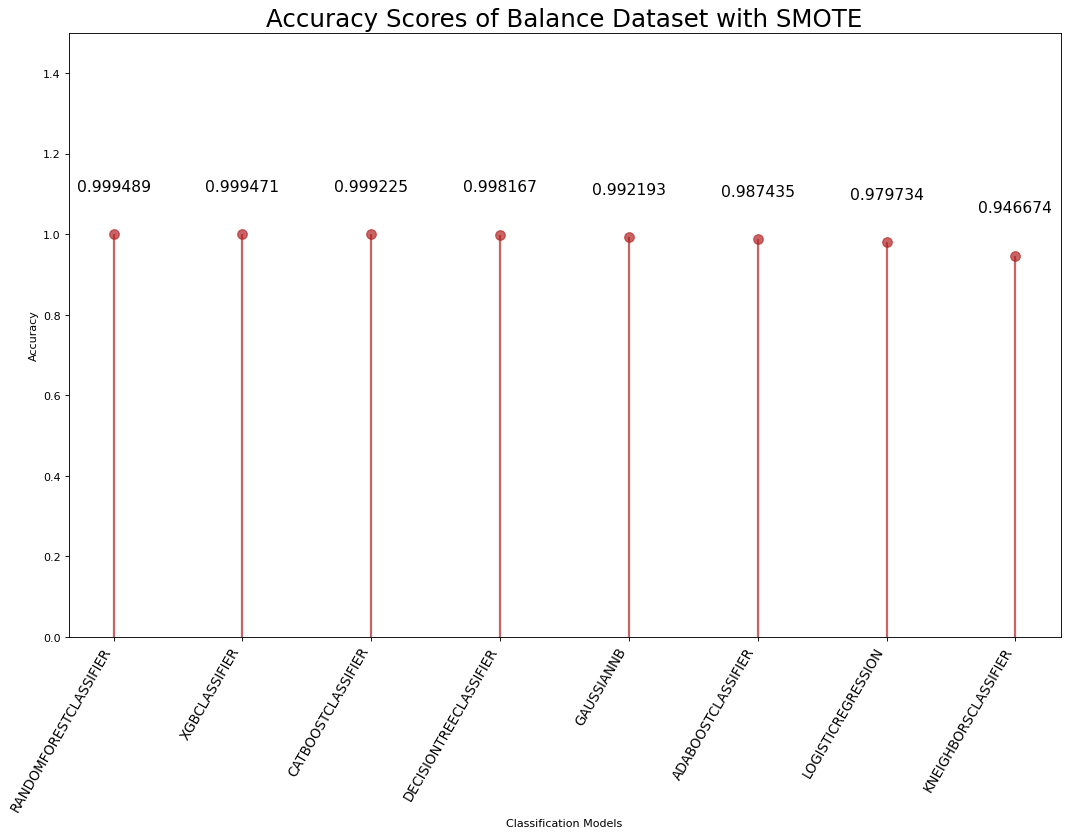

In [42]:
#plot a chart
PlotLollipopChart(smote_res_df, 'Accuracy Scores of Balance Dataset with SMOTE')

### 3.3.3 ROC Report

In [94]:
#Show the top 4 models of Classification Report
ModelResult(smote_res_df,4)

RandomForestClassifier Report: 

ROC Score:
0.9175128738454579

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56662
           1       0.13      0.84      0.22        83

    accuracy                           0.99     56745
   macro avg       0.56      0.92      0.61     56745
weighted avg       1.00      0.99      0.99     56745


Confusion Matrix:
[[56189   473]
 [   13    70]]



XGBClassifier Report: 

ROC Score:
0.9445625146450758

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56662
           1       0.08      0.90      0.15        83

    accuracy                           0.99     56745
   macro avg       0.54      0.94      0.57     56745
weighted avg       1.00      0.99      0.99     56745


Confusion Matrix:
[[55841   821]
 [    8    75]]



CatBoostClassifier Report: 

ROC Score:
0.950180695249318

Classification R

### 3.3.4 ROC Graph

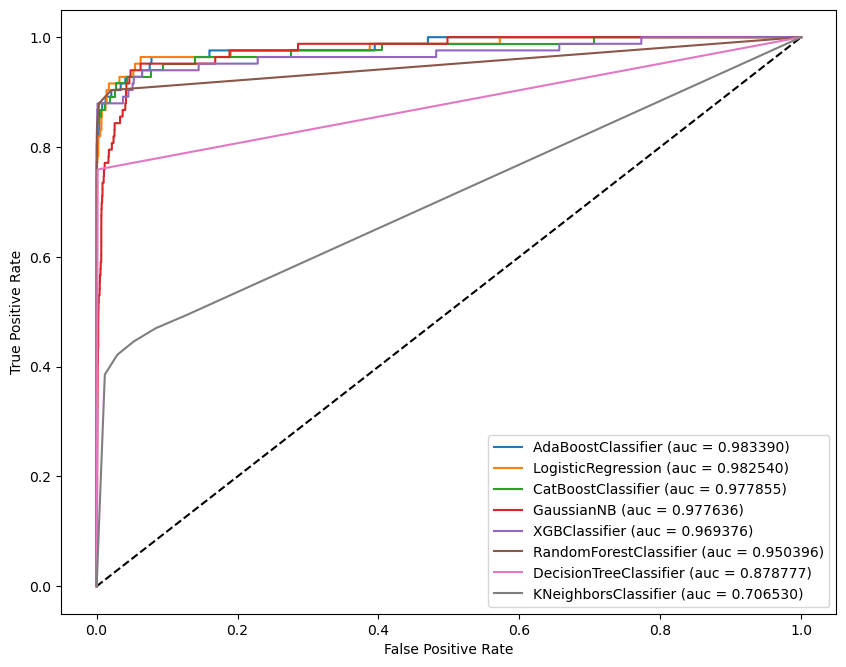

In [44]:
#Plot ROC Graph
ROCGraph(smote_roc_result_df)

### 3.3.3 Result

##### Based on predictive accuracy of balance dataset with SMOTE. 
The RandomforestClassifier model is the best model with score is 0.999489. followd by XGBClassifier model with score is 0.999471.
Therefore, RandomforestClassifier is the best model for out-of-sample predictions of SMOTE resampling method.

## 3.4 Balance dataset with Oversampling

### 3.4.1 Implement the pipeline for balance dataset with Oversampling

In [45]:
#set emply for valiable
names = []
resampling_name = []

#test 
r2 = []
rmse = []
roc = []
accuracy_s = []
auc_score = []
fpr = []
tpr = []
y_pred_report = []

#train
r2_train = []
rmse_train = []
roc_train = []
accuracy_s_train = []

#perform the pipeline with RandomOverSampling method
for model in models:
    run_pipeline(RandomOverSampler(sampling_strategy=0.5))

#convert result to a dataframe format.
over_roc_result_df = pd.DataFrame(zip(names,resampling_name,auc_score,fpr,tpr),columns=['Classifier','Resampling','AUC','FPR','TPR'])
over_res_df = pd.DataFrame(zip(names,resampling_name,accuracy_s,roc,r2,rmse,accuracy_s_train,roc_train,r2_train,rmse_train),columns=['Classifier','Resampling','Accuracy score (Test)','ROC-AUC (Test)','R2 score (Test)','RMSE (Test)','Accuracy score (Train)','ROC-AUC (Train)','R2 score (Train)','RMSE (Train)'])


/Users/maxllxam/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/maxllxam/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10:25:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.124111
0:	learn: 0.4877112	total: 54.8ms	remaining: 54.8s
1:	learn: 0.3586026	total: 90.5ms	remaining: 45.1s
2:	learn: 0.2786074	total: 121ms	remaining: 40.3s
3:	learn: 0.2221110	total: 153ms	remaining: 38.2s
4:	learn: 0.1878803	total: 187ms	remaining: 37.2s
5:	learn: 0.1657560	total: 219ms	remaining: 36.2s
6:	learn: 0.1347850	total: 257ms	remaining: 36.4s
7:	learn: 0.1125609	total: 290ms	remaining: 35.9s
8:	learn: 0.1011560	total: 330ms	remaining: 36.4s
9:	learn: 0.0963770	total: 362ms	remaining: 35.8s
10:	learn: 0.0908729	total: 395ms	remaining: 35.5s
11:	learn: 0.0849252	total: 426ms	remaining: 35s
12:	learn: 0.0798564	total: 456ms	remaining: 34.6s
13:	learn: 0.0731067	total: 487ms	remaining: 34.3s
14:	learn: 0.0

156:	learn: 0.0019176	total: 4.58s	remaining: 24.6s
157:	learn: 0.0018959	total: 4.6s	remaining: 24.5s
158:	learn: 0.0018480	total: 4.63s	remaining: 24.5s
159:	learn: 0.0018390	total: 4.65s	remaining: 24.4s
160:	learn: 0.0017975	total: 4.68s	remaining: 24.4s
161:	learn: 0.0017702	total: 4.71s	remaining: 24.4s
162:	learn: 0.0017415	total: 4.73s	remaining: 24.3s
163:	learn: 0.0017269	total: 4.76s	remaining: 24.3s
164:	learn: 0.0016995	total: 4.79s	remaining: 24.2s
165:	learn: 0.0016743	total: 4.82s	remaining: 24.2s
166:	learn: 0.0016471	total: 4.84s	remaining: 24.2s
167:	learn: 0.0016341	total: 4.87s	remaining: 24.1s
168:	learn: 0.0016188	total: 4.9s	remaining: 24.1s
169:	learn: 0.0016018	total: 4.92s	remaining: 24s
170:	learn: 0.0015850	total: 4.95s	remaining: 24s
171:	learn: 0.0015758	total: 4.98s	remaining: 24s
172:	learn: 0.0015481	total: 5.01s	remaining: 23.9s
173:	learn: 0.0015299	total: 5.03s	remaining: 23.9s
174:	learn: 0.0015037	total: 5.06s	remaining: 23.9s
175:	learn: 0.001490

318:	learn: 0.0011758	total: 7.97s	remaining: 17s
319:	learn: 0.0011757	total: 7.99s	remaining: 17s
320:	learn: 0.0011757	total: 8.01s	remaining: 16.9s
321:	learn: 0.0011757	total: 8.03s	remaining: 16.9s
322:	learn: 0.0011757	total: 8.05s	remaining: 16.9s
323:	learn: 0.0011757	total: 8.07s	remaining: 16.8s
324:	learn: 0.0011757	total: 8.09s	remaining: 16.8s
325:	learn: 0.0011757	total: 8.11s	remaining: 16.8s
326:	learn: 0.0011757	total: 8.13s	remaining: 16.7s
327:	learn: 0.0011757	total: 8.14s	remaining: 16.7s
328:	learn: 0.0011757	total: 8.16s	remaining: 16.6s
329:	learn: 0.0011757	total: 8.18s	remaining: 16.6s
330:	learn: 0.0011757	total: 8.2s	remaining: 16.6s
331:	learn: 0.0011757	total: 8.22s	remaining: 16.5s
332:	learn: 0.0011757	total: 8.24s	remaining: 16.5s
333:	learn: 0.0011757	total: 8.26s	remaining: 16.5s
334:	learn: 0.0011652	total: 8.29s	remaining: 16.5s
335:	learn: 0.0011588	total: 8.32s	remaining: 16.4s
336:	learn: 0.0011408	total: 8.35s	remaining: 16.4s
337:	learn: 0.001

478:	learn: 0.0010837	total: 11.2s	remaining: 12.2s
479:	learn: 0.0010837	total: 11.2s	remaining: 12.1s
480:	learn: 0.0010837	total: 11.2s	remaining: 12.1s
481:	learn: 0.0010837	total: 11.2s	remaining: 12.1s
482:	learn: 0.0010837	total: 11.3s	remaining: 12.1s
483:	learn: 0.0010837	total: 11.3s	remaining: 12s
484:	learn: 0.0010837	total: 11.3s	remaining: 12s
485:	learn: 0.0010837	total: 11.3s	remaining: 12s
486:	learn: 0.0010837	total: 11.3s	remaining: 11.9s
487:	learn: 0.0010837	total: 11.4s	remaining: 11.9s
488:	learn: 0.0010837	total: 11.4s	remaining: 11.9s
489:	learn: 0.0010837	total: 11.4s	remaining: 11.9s
490:	learn: 0.0010837	total: 11.4s	remaining: 11.8s
491:	learn: 0.0010837	total: 11.4s	remaining: 11.8s
492:	learn: 0.0010837	total: 11.5s	remaining: 11.8s
493:	learn: 0.0010837	total: 11.5s	remaining: 11.8s
494:	learn: 0.0010837	total: 11.5s	remaining: 11.7s
495:	learn: 0.0010837	total: 11.5s	remaining: 11.7s
496:	learn: 0.0010837	total: 11.5s	remaining: 11.7s
497:	learn: 0.0010

640:	learn: 0.0010648	total: 14.4s	remaining: 8.06s
641:	learn: 0.0010648	total: 14.4s	remaining: 8.04s
642:	learn: 0.0010648	total: 14.4s	remaining: 8.02s
643:	learn: 0.0010648	total: 14.5s	remaining: 7.99s
644:	learn: 0.0010647	total: 14.5s	remaining: 7.97s
645:	learn: 0.0010647	total: 14.5s	remaining: 7.94s
646:	learn: 0.0010647	total: 14.5s	remaining: 7.92s
647:	learn: 0.0010647	total: 14.5s	remaining: 7.89s
648:	learn: 0.0010647	total: 14.6s	remaining: 7.87s
649:	learn: 0.0010647	total: 14.6s	remaining: 7.85s
650:	learn: 0.0010647	total: 14.6s	remaining: 7.82s
651:	learn: 0.0010647	total: 14.6s	remaining: 7.8s
652:	learn: 0.0010647	total: 14.6s	remaining: 7.78s
653:	learn: 0.0010647	total: 14.7s	remaining: 7.75s
654:	learn: 0.0010647	total: 14.7s	remaining: 7.73s
655:	learn: 0.0010647	total: 14.7s	remaining: 7.71s
656:	learn: 0.0010647	total: 14.7s	remaining: 7.68s
657:	learn: 0.0010647	total: 14.7s	remaining: 7.66s
658:	learn: 0.0010647	total: 14.8s	remaining: 7.63s
659:	learn: 0

808:	learn: 0.0010646	total: 18s	remaining: 4.24s
809:	learn: 0.0010646	total: 18s	remaining: 4.22s
810:	learn: 0.0010646	total: 18s	remaining: 4.2s
811:	learn: 0.0010646	total: 18s	remaining: 4.17s
812:	learn: 0.0010646	total: 18s	remaining: 4.15s
813:	learn: 0.0010646	total: 18.1s	remaining: 4.13s
814:	learn: 0.0010646	total: 18.1s	remaining: 4.1s
815:	learn: 0.0010646	total: 18.1s	remaining: 4.08s
816:	learn: 0.0010646	total: 18.1s	remaining: 4.06s
817:	learn: 0.0010646	total: 18.1s	remaining: 4.04s
818:	learn: 0.0010646	total: 18.2s	remaining: 4.01s
819:	learn: 0.0010646	total: 18.2s	remaining: 3.99s
820:	learn: 0.0010646	total: 18.2s	remaining: 3.97s
821:	learn: 0.0010646	total: 18.2s	remaining: 3.94s
822:	learn: 0.0010646	total: 18.2s	remaining: 3.92s
823:	learn: 0.0010646	total: 18.3s	remaining: 3.9s
824:	learn: 0.0010646	total: 18.3s	remaining: 3.88s
825:	learn: 0.0010646	total: 18.3s	remaining: 3.85s
826:	learn: 0.0010646	total: 18.3s	remaining: 3.83s
827:	learn: 0.0010646	tot

969:	learn: 0.0010645	total: 21.1s	remaining: 654ms
970:	learn: 0.0010645	total: 21.2s	remaining: 632ms
971:	learn: 0.0010645	total: 21.2s	remaining: 610ms
972:	learn: 0.0010645	total: 21.2s	remaining: 588ms
973:	learn: 0.0010645	total: 21.2s	remaining: 567ms
974:	learn: 0.0010645	total: 21.2s	remaining: 545ms
975:	learn: 0.0010645	total: 21.3s	remaining: 523ms
976:	learn: 0.0010645	total: 21.3s	remaining: 501ms
977:	learn: 0.0010645	total: 21.3s	remaining: 479ms
978:	learn: 0.0010645	total: 21.3s	remaining: 457ms
979:	learn: 0.0010645	total: 21.3s	remaining: 436ms
980:	learn: 0.0010645	total: 21.4s	remaining: 414ms
981:	learn: 0.0010645	total: 21.4s	remaining: 392ms
982:	learn: 0.0010645	total: 21.4s	remaining: 370ms
983:	learn: 0.0010645	total: 21.4s	remaining: 348ms
984:	learn: 0.0010645	total: 21.4s	remaining: 326ms
985:	learn: 0.0010645	total: 21.5s	remaining: 305ms
986:	learn: 0.0010645	total: 21.5s	remaining: 283ms
987:	learn: 0.0010645	total: 21.5s	remaining: 261ms
988:	learn: 

In [46]:
#sorting the result

over_roc_result_df = over_roc_result_df.sort_values(by='AUC',ascending=False).reset_index(drop=True)
over_res_df = over_res_df.sort_values(by='Accuracy score (Test)',ascending=False).reset_index(drop=True)
over_res_df

,Classifier,Resampling,Accuracy score (Test),ROC-AUC (Test),R2 score (Test),RMSE (Test),Accuracy score (Train),ROC-AUC (Train),R2 score (Train),RMSE (Train)
0,RandomForestClassifier,RandomOverSampler,0.999577,0.873468,0.999577,0.020566,1.000000,1.000000,1.000000,0.000000
1,XGBClassifier,RandomOverSampler,0.999507,0.891478,0.999507,0.022213,1.000000,1.000000,1.000000,0.000000
2,CatBoostClassifier,RandomOverSampler,0.999454,0.897467,0.999454,0.023373,0.999903,0.999951,0.999903,0.009845
3,DecisionTreeClassifier,RandomOverSampler,0.999136,0.861216,0.999136,0.029386,1.000000,1.000000,1.000000,0.000000
4,KNeighborsClassifier,RandomOverSampler,0.997198,0.607604,0.997198,0.052934,0.998982,0.999490,0.998982,0.031902
5,GaussianNB,RandomOverSampler,0.990484,0.820792,0.990484,0.097551,0.990858,0.863597,0.990858,0.095613
6,AdaBoostClassifier,RandomOverSampler,0.990237,0.928943,0.990237,0.098808,0.990012,0.959162,0.990012,0.099939
7,LogisticRegression,RandomOverSampler,0.979223,0.947489,0.979223,0.144143,0.979011,0.934454,0.979011,0.144875


### 3.4.2 Compare the accuracy score with chart

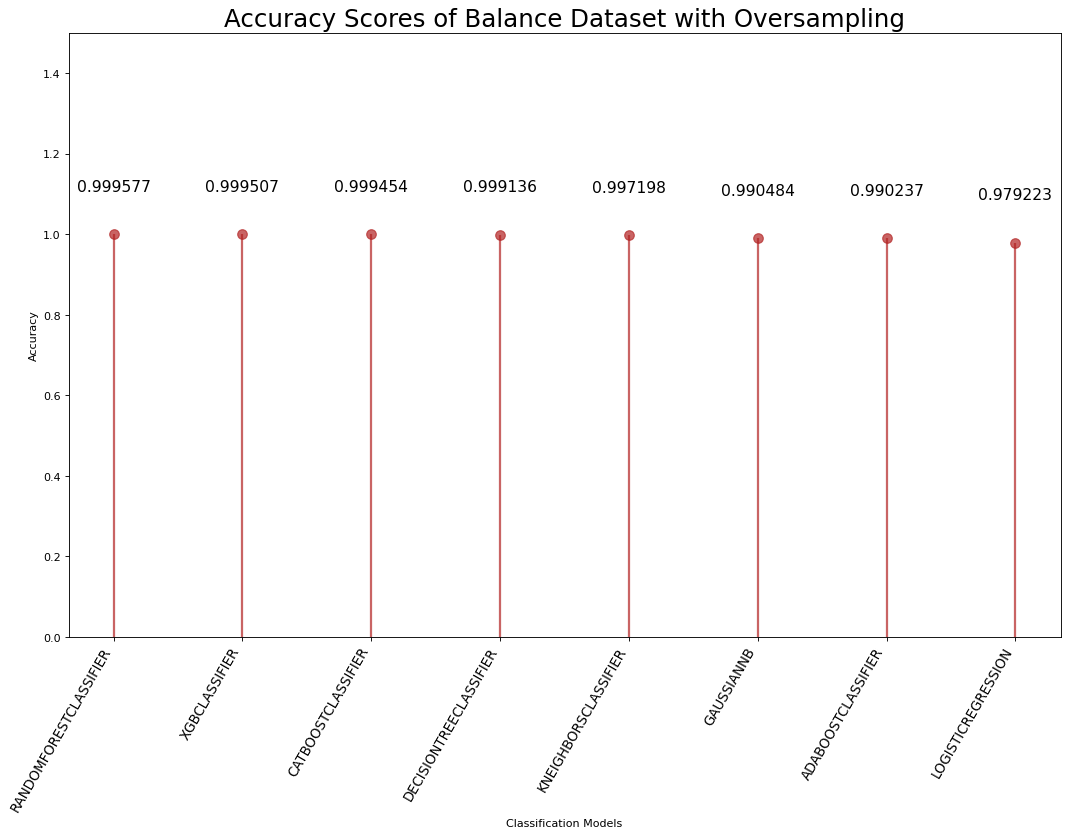

In [47]:
#plot a chart
PlotLollipopChart(over_res_df, 'Accuracy Scores of Balance Dataset with Oversampling')

### 3.4.3 ROC Report

In [48]:
#Show the top 4 models of Classification Report
ModelResult(over_res_df,4)

RandomForestClassifier Report: 

ROC Score:
0.8734675031352689

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56662
           1       0.95      0.75      0.84        83

    accuracy                           1.00     56745
   macro avg       0.98      0.87      0.92     56745
weighted avg       1.00      1.00      1.00     56745


Confusion Matrix:
[[56659     3]
 [   21    62]]



XGBClassifier Report: 

ROC Score:
0.8914780224990889

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56662
           1       0.87      0.78      0.82        83

    accuracy                           1.00     56745
   macro avg       0.93      0.89      0.91     56745
weighted avg       1.00      1.00      1.00     56745


Confusion Matrix:
[[56652    10]
 [   18    65]]



CatBoostClassifier Report: 

ROC Score:
0.8974668218601702

Classification 

### 3.4.4 ROC Graph

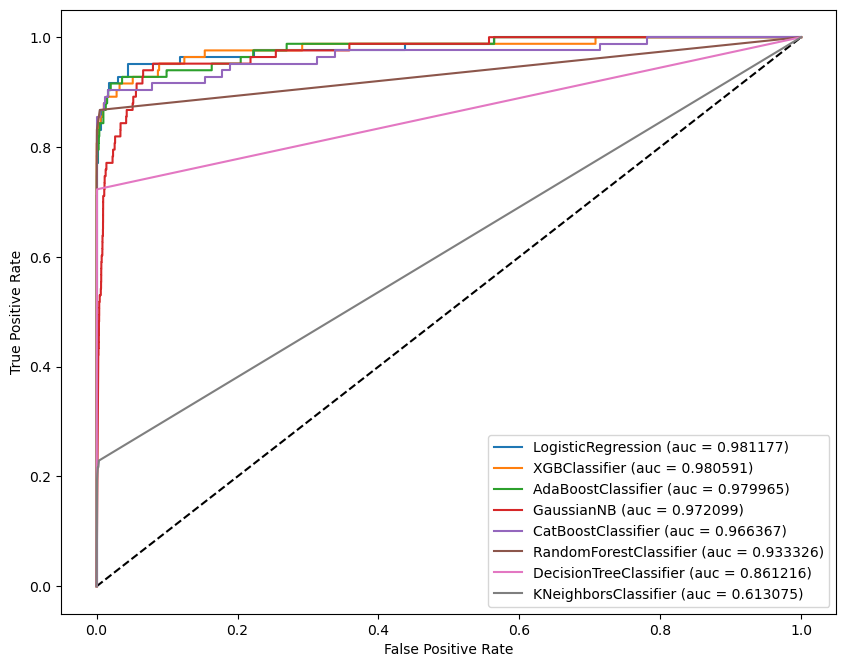

In [49]:
#Plot ROC Graph
ROCGraph(over_roc_result_df)

### 3.4.5 Result

##### Based on predictive accuracy of balance dataset with Oversampling. 
The RanforestClassifier model is the best model with score is 0.999577. followd by XGBClassifier model with score is 0.999507.
Therefore, RanforestClassifier is the best model for out-of-sample predictions of Oversampling method.

## 3.5 Balance dataset with Undersampling

### 3.5.1 Implement the pipeline for balance dataset with Undersampling

In [50]:
#set emply for valiable
names = []
resampling_name = []

#test 
r2 = []
rmse = []
roc = []
accuracy_s = []
auc_score = []
fpr = []
tpr = []
y_pred_report = []

#train
r2_train = []
rmse_train = []
roc_train = []
accuracy_s_train = []

#perform the pipeline with RandomUnderSampling method
for model in models:
    run_pipeline(RandomUnderSampler(sampling_strategy=0.5))

#convert result to a dataframe format.
under_roc_result_df = pd.DataFrame(zip(names,resampling_name,auc_score,fpr,tpr),columns=['Classifier','Resampling','AUC','FPR','TPR'])
under_res_df = pd.DataFrame(zip(names,resampling_name,accuracy_s,roc,r2,rmse,accuracy_s_train,roc_train,r2_train,rmse_train),columns=['Classifier','Resampling','Accuracy score (Test)','ROC-AUC (Test)','R2 score (Test)','RMSE (Test)','Accuracy score (Train)','ROC-AUC (Train)','R2 score (Train)','RMSE (Train)'])


/Users/maxllxam/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/maxllxam/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10:26:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.011017
0:	learn: 0.6776503	total: 7.59ms	remaining: 7.58s
1:	learn: 0.6621273	total: 9.98ms	remaining: 4.98s
2:	learn: 0.6482801	total: 12.2ms	remaining: 4.07s
3:	learn: 0.6346047	total: 14.4ms	remaining: 3.59s
4:	learn: 0.6193831	total: 17ms	remaining: 3.38s
5:	learn: 0.6060620	total: 19.5ms	remaining: 3.23s
6:	learn: 0.5936530	total: 21.6ms	remaining: 3.07s
7:	learn: 0.5794061	total: 24.6ms	remaining: 3.06s
8:	learn: 0.5665749	total: 27.3ms	remaining: 3s
9:	learn: 0.5538852	total: 29.6ms	remaining: 2.93s
10:	learn: 0.5400231	total: 31.8ms	remaining: 2.86s
11:	learn: 0.5284634	total: 34ms	remaining: 2.8s
12:	learn: 0.5170269	total: 36.2ms	remaining: 2.75s
13:	learn: 0.5074403	total: 38.7ms	remaining: 2.72s
14:	lear

165:	learn: 0.1088116	total: 379ms	remaining: 1.9s
166:	learn: 0.1083124	total: 381ms	remaining: 1.9s
167:	learn: 0.1079152	total: 383ms	remaining: 1.9s
168:	learn: 0.1074645	total: 385ms	remaining: 1.9s
169:	learn: 0.1070108	total: 388ms	remaining: 1.89s
170:	learn: 0.1064009	total: 390ms	remaining: 1.89s
171:	learn: 0.1059890	total: 392ms	remaining: 1.89s
172:	learn: 0.1055589	total: 394ms	remaining: 1.88s
173:	learn: 0.1053405	total: 397ms	remaining: 1.88s
174:	learn: 0.1049053	total: 399ms	remaining: 1.88s
175:	learn: 0.1046040	total: 401ms	remaining: 1.88s
176:	learn: 0.1043528	total: 403ms	remaining: 1.87s
177:	learn: 0.1039121	total: 405ms	remaining: 1.87s
178:	learn: 0.1033608	total: 407ms	remaining: 1.87s
179:	learn: 0.1028286	total: 410ms	remaining: 1.86s
180:	learn: 0.1023751	total: 412ms	remaining: 1.86s
181:	learn: 0.1020630	total: 414ms	remaining: 1.86s
182:	learn: 0.1016768	total: 416ms	remaining: 1.86s
183:	learn: 0.1014385	total: 418ms	remaining: 1.85s
184:	learn: 0.10

336:	learn: 0.0679690	total: 764ms	remaining: 1.5s
337:	learn: 0.0679090	total: 766ms	remaining: 1.5s
338:	learn: 0.0677534	total: 768ms	remaining: 1.5s
339:	learn: 0.0676324	total: 770ms	remaining: 1.5s
340:	learn: 0.0674203	total: 773ms	remaining: 1.49s
341:	learn: 0.0670755	total: 775ms	remaining: 1.49s
342:	learn: 0.0670404	total: 777ms	remaining: 1.49s
343:	learn: 0.0668776	total: 780ms	remaining: 1.49s
344:	learn: 0.0668460	total: 782ms	remaining: 1.48s
345:	learn: 0.0666476	total: 784ms	remaining: 1.48s
346:	learn: 0.0665649	total: 786ms	remaining: 1.48s
347:	learn: 0.0665118	total: 789ms	remaining: 1.48s
348:	learn: 0.0664530	total: 791ms	remaining: 1.48s
349:	learn: 0.0664237	total: 793ms	remaining: 1.47s
350:	learn: 0.0663920	total: 795ms	remaining: 1.47s
351:	learn: 0.0662719	total: 798ms	remaining: 1.47s
352:	learn: 0.0660700	total: 800ms	remaining: 1.47s
353:	learn: 0.0658845	total: 802ms	remaining: 1.46s
354:	learn: 0.0656988	total: 805ms	remaining: 1.46s
355:	learn: 0.06

505:	learn: 0.0496110	total: 1.15s	remaining: 1.12s
506:	learn: 0.0494874	total: 1.15s	remaining: 1.12s
507:	learn: 0.0493115	total: 1.16s	remaining: 1.12s
508:	learn: 0.0492653	total: 1.16s	remaining: 1.12s
509:	learn: 0.0492366	total: 1.16s	remaining: 1.11s
510:	learn: 0.0491172	total: 1.16s	remaining: 1.11s
511:	learn: 0.0490856	total: 1.17s	remaining: 1.11s
512:	learn: 0.0489733	total: 1.17s	remaining: 1.11s
513:	learn: 0.0488826	total: 1.17s	remaining: 1.11s
514:	learn: 0.0488683	total: 1.17s	remaining: 1.1s
515:	learn: 0.0488370	total: 1.18s	remaining: 1.1s
516:	learn: 0.0486152	total: 1.18s	remaining: 1.1s
517:	learn: 0.0485900	total: 1.18s	remaining: 1.1s
518:	learn: 0.0484950	total: 1.18s	remaining: 1.1s
519:	learn: 0.0484542	total: 1.19s	remaining: 1.09s
520:	learn: 0.0484357	total: 1.19s	remaining: 1.09s
521:	learn: 0.0483430	total: 1.19s	remaining: 1.09s
522:	learn: 0.0481589	total: 1.19s	remaining: 1.09s
523:	learn: 0.0480890	total: 1.19s	remaining: 1.08s
524:	learn: 0.047

690:	learn: 0.0366799	total: 1.54s	remaining: 688ms
691:	learn: 0.0365487	total: 1.54s	remaining: 686ms
692:	learn: 0.0365028	total: 1.54s	remaining: 683ms
693:	learn: 0.0363430	total: 1.54s	remaining: 681ms
694:	learn: 0.0363141	total: 1.55s	remaining: 679ms
695:	learn: 0.0362463	total: 1.55s	remaining: 677ms
696:	learn: 0.0362299	total: 1.55s	remaining: 674ms
697:	learn: 0.0360960	total: 1.55s	remaining: 672ms
698:	learn: 0.0359723	total: 1.55s	remaining: 670ms
699:	learn: 0.0359516	total: 1.56s	remaining: 667ms
700:	learn: 0.0358603	total: 1.56s	remaining: 665ms
701:	learn: 0.0357485	total: 1.56s	remaining: 663ms
702:	learn: 0.0357293	total: 1.56s	remaining: 660ms
703:	learn: 0.0357091	total: 1.56s	remaining: 658ms
704:	learn: 0.0356217	total: 1.57s	remaining: 656ms
705:	learn: 0.0355994	total: 1.57s	remaining: 653ms
706:	learn: 0.0354560	total: 1.57s	remaining: 651ms
707:	learn: 0.0354112	total: 1.57s	remaining: 649ms
708:	learn: 0.0353453	total: 1.57s	remaining: 646ms
709:	learn: 

884:	learn: 0.0285173	total: 1.93s	remaining: 251ms
885:	learn: 0.0285065	total: 1.93s	remaining: 248ms
886:	learn: 0.0284366	total: 1.93s	remaining: 246ms
887:	learn: 0.0284093	total: 1.93s	remaining: 244ms
888:	learn: 0.0283875	total: 1.94s	remaining: 242ms
889:	learn: 0.0283714	total: 1.94s	remaining: 240ms
890:	learn: 0.0283144	total: 1.94s	remaining: 237ms
891:	learn: 0.0281869	total: 1.94s	remaining: 235ms
892:	learn: 0.0281180	total: 1.94s	remaining: 233ms
893:	learn: 0.0280550	total: 1.95s	remaining: 231ms
894:	learn: 0.0279851	total: 1.95s	remaining: 229ms
895:	learn: 0.0279658	total: 1.95s	remaining: 226ms
896:	learn: 0.0279193	total: 1.95s	remaining: 224ms
897:	learn: 0.0278992	total: 1.95s	remaining: 222ms
898:	learn: 0.0278712	total: 1.96s	remaining: 220ms
899:	learn: 0.0278457	total: 1.96s	remaining: 218ms
900:	learn: 0.0278050	total: 1.96s	remaining: 215ms
901:	learn: 0.0277542	total: 1.96s	remaining: 213ms
902:	learn: 0.0277394	total: 1.96s	remaining: 211ms
903:	learn: 

In [51]:
#sorting the result

under_roc_result_df = under_roc_result_df.sort_values(by='AUC',ascending=False).reset_index(drop=True)
under_res_df = under_res_df.sort_values(by='Accuracy score (Test)',ascending=False).reset_index(drop=True)
under_res_df

,Classifier,Resampling,Accuracy score (Test),ROC-AUC (Test),R2 score (Test),RMSE (Test),Accuracy score (Train),ROC-AUC (Train),R2 score (Train),RMSE (Train)
0,RandomForestClassifier,RandomUnderSampler,0.991435,0.917513,0.991435,0.092545,0.991634,0.985571,0.991634,0.091468
1,GaussianNB,RandomUnderSampler,0.990149,0.814609,0.990149,0.099253,0.990387,0.854402,0.990387,0.098047
2,XGBClassifier,RandomUnderSampler,0.985391,0.944563,0.985391,0.120869,0.984910,0.992442,0.984910,0.122840
3,CatBoostClassifier,RandomUnderSampler,0.984598,0.950181,0.984598,0.124106,0.983862,0.988078,0.983862,0.127036
4,LogisticRegression,RandomUnderSampler,0.977231,0.940477,0.977231,0.150892,0.976610,0.934531,0.976610,0.152938
5,AdaBoostClassifier,RandomUnderSampler,0.975681,0.933685,0.975681,0.155947,0.976002,0.966223,0.976002,0.154913
6,DecisionTreeClassifier,RandomUnderSampler,0.944453,0.924064,0.944453,0.235684,0.943065,0.971483,0.943065,0.238611
7,KNeighborsClassifier,RandomUnderSampler,0.844162,0.579097,0.844162,0.394763,0.842628,0.708724,0.842628,0.396702


### 3.5.2 Compare the accuracy score with chart

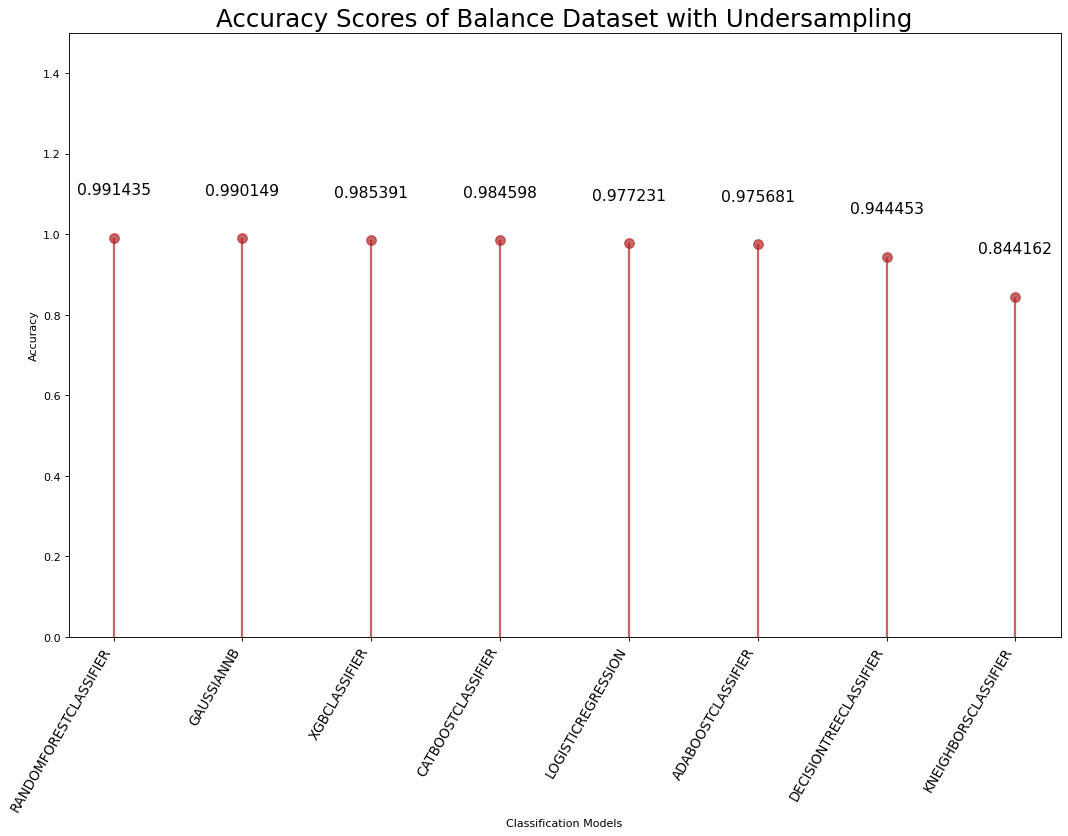

In [52]:
#plot a chart
PlotLollipopChart(under_res_df, 'Accuracy Scores of Balance Dataset with Undersampling')

### 3.5.3 ROC Report

In [53]:
#Show the top 3 models of Classification Report
ModelResult(under_res_df,3)

RandomForestClassifier Report: 

ROC Score:
0.9175128738454579

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56662
           1       0.13      0.84      0.22        83

    accuracy                           0.99     56745
   macro avg       0.56      0.92      0.61     56745
weighted avg       1.00      0.99      0.99     56745


Confusion Matrix:
[[56189   473]
 [   13    70]]



GaussianNB Report: 

ROC Score:
0.814609076948789

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56662
           1       0.09      0.64      0.16        83

    accuracy                           0.99     56745
   macro avg       0.55      0.81      0.58     56745
weighted avg       1.00      0.99      0.99     56745


Confusion Matrix:
[[56133   529]
 [   30    53]]



XGBClassifier Report: 

ROC Score:
0.9445625146450758

Classification Report:
 

### 3.5.4 ROC Graph

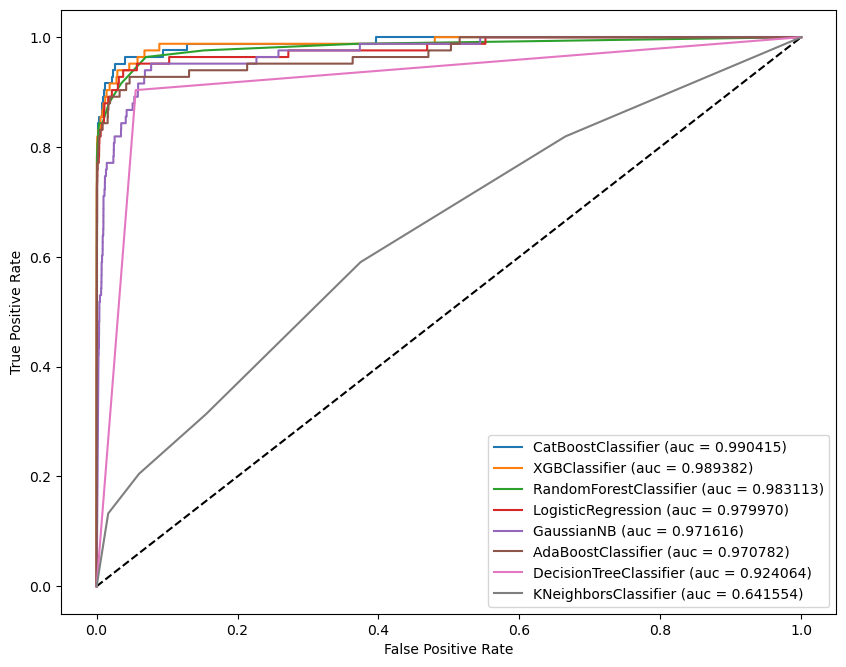

In [54]:
#Plot ROC Graph
ROCGraph(under_roc_result_df)

### 3.5.5 Result

##### Based on predictive accuracy of balance dataset with Undersampling. 
The RandomForestClassifier model is the best model with score is 0.991435. followd by GaussianNB model with score is 0.990149.
Therefore, RandomForestClassifier is the best model for out-of-sample predictions of Undersampling method.

# 4. Conclusion

Based on the results, it appears that using resampling methods can significantly improve the performance of classification models on imbalanced datasets. 
The top-performing models for each resampling method are as follows:

- SMOTE method: RandomForestClassifier, XGBClassifier, CatBoostClassifier
- Oversampling method: RandomForestClassifier, XGBClassifier, CatBoostClassifier
- Undersampling method: RandomForestClassifier, GaussianNB, XGBClassifier

In terms of overall performance, the top three models on the balanced dataset (using any of the resampling methods) are:

- RandomForestClassifier
- XGBClassifier
- CatBoostClassifier

In the case of the imbalanced dataset, CatBoostClassifier performs the best followed by RandomForestClassifier and XGBClassifier. However, after applying the resampling methods, RandomForestClassifier and XGBClassifier perform better than CatBoostClassifier in terms of accuracy, ROC-AUC score, R2 score, and RMSE, while CatBoostClassifier still performs well in terms of AUC score.

Among the resampling methods, SMOTE performs the best, followed by Oversampling and Undersampling, in terms of accuracy, ROC-AUC score, R2 score, and AUC score. However, Undersampling has a lower RMSE than Oversampling, indicating that it may be more accurate in predicting fraud cases.

In conclusion, it is clear that the choice of resampling method has a significant impact on the performance of the classification models. SMOTE seems to be the most effective resampling method for the given dataset, while CatBoostClassifier, RandomForestClassifier, and XGBClassifier are good choices for classification models.